# Jessica Williams Capstone Exploratory Data Analysis(EDA)

We are now looking at a dataframe of recipe attributes that contains 223 columns and 231637 rows. I also added the original raw recipes csv in the event that I want to use the count vetorizer on some different ngram ranges and create more features. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from yellowbrick.text import FreqDistVisualizer
from pathlib import Path
nlp=spacy.load('en_core_web_sm')

from sb_utils import save_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [2]:
raw_recipes = pd.read_csv('RAW_recipes.csv')

In [3]:
recipe_attributes = pd.read_csv('C:/Users/jwatki8/Downloads/My Capstone project/recipe_attributes.csv')

In [4]:
recipe_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Columns: 223 entries, name to ingr_wine
dtypes: float64(213), int64(3), object(7)
memory usage: 394.1+ MB


In [5]:
recipe_attributes.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,ingr_sugar,ingr_sweet,ingr_tomato,ingr_tomatoes,ingr_vanilla,ingr_vegetable,ingr_vinegar,ingr_water,ingr_white,ingr_wine
0,arriba baked winter squash mexican style,137739,55.0,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11.0,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a bit different breakfast pizza,31490,30.0,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9.0,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,all in the kitchen chili,112140,130.0,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6.0,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,alouette potatoes,59389,45.0,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11.0,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,amish tomato ketchup for canning,44061,190.0,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5.0,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(recipe_attributes.columns.values.tolist())

['name', 'recipe_id', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients', 'rating_mean', 'review_count', 'step_10', 'step_15', 'step_20', 'step_30', 'step_350', 'step_add', 'step_aside', 'step_bake', 'step_baking', 'step_beat', 'step_boil', 'step_bowl', 'step_bring', 'step_brown', 'step_butter', 'step_cheese', 'step_chicken', 'step_combine', 'step_cook', 'step_cooked', 'step_cooking', 'step_cool', 'step_cover', 'step_cream', 'step_cup', 'step_cut', 'step_degrees', 'step_dish', 'step_drain', 'step_dry', 'step_egg', 'step_eggs', 'step_flour', 'step_garlic', 'step_golden', 'step_half', 'step_heat', 'step_high', 'step_hot', 'step_hour', 'step_hours', 'step_inch', 'step_ingredients', 'step_juice', 'step_just', 'step_large', 'step_let', 'step_lightly', 'step_low', 'step_make', 'step_medium', 'step_milk', 'step_minutes', 'step_mix', 'step_mixture', 'step_oil', 'step_onion', 'step_onions', 'step_oven', 'step_pan', 's

In [7]:
recipe_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Columns: 223 entries, name to ingr_wine
dtypes: float64(213), int64(3), object(7)
memory usage: 394.1+ MB


Just to do a bit of tidying up, I think it is a good idea to convert the recipe id column to a string as this is the unique id for the recipes and not a numeric variable.

In [8]:
recipe_attributes=recipe_attributes.astype({'recipe_id':'str'})

In [9]:
recipe_attributes['recipe_id'].value_counts()

137739    1
424135    1
8519      1
3389      1
84560     1
         ..
74884     1
273818    1
427020    1
71033     1
298509    1
Name: recipe_id, Length: 231637, dtype: int64

I want to quickly separate out the attributes that are not word vectorizer features just to take a clean look. I want to examine their place in respect to what I will call the user satisfaction attributes which are the review count and the rating mean for each recipe. 

In [10]:
recipe_attributes_sub1=recipe_attributes[['name','recipe_id', 'minutes','n_steps', 'n_ingredients','rating_mean','review_count']]

print(recipe_attributes_sub1.head())


                                         name recipe_id  minutes  n_steps  \
0  arriba   baked winter squash mexican style    137739     55.0     11.0   
1            a bit different  breakfast pizza     31490     30.0      9.0   
2                   all in the kitchen  chili    112140    130.0      6.0   
3                          alouette  potatoes     59389     45.0     11.0   
4          amish  tomato ketchup  for canning     44061    190.0      5.0   

   n_ingredients  rating_mean  review_count  
0            7.0          5.0             3  
1            6.0          3.5             4  
2           13.0          4.0             1  
3           11.0          4.5             2  
4            8.0          5.0             1  


In [11]:
recipe_attributes_sub2=recipe_attributes.drop(columns=['name','recipe_id','minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients', 'rating_mean', 'review_count'])

print(recipe_attributes_sub2.head())



   step_10  step_15  step_20  step_30  step_350  step_add  step_aside  \
0      0.0      0.0      0.0      0.0       1.0       0.0         0.0   
1      0.0      1.0      0.0      0.0       1.0       1.0         1.0   
2      0.0      0.0      0.0      1.0       1.0       0.0         1.0   
3      0.0      0.0      0.0      0.0       0.0       0.0         0.0   
4      0.0      0.0      0.0      0.0       0.0       0.0         0.0   

   step_bake  step_baking  step_beat  ...  ingr_sugar  ingr_sweet  \
0        1.0          1.0        0.0  ...         0.0         0.0   
1        1.0          1.0        0.0  ...         0.0         0.0   
2        0.0          0.0        0.0  ...         1.0         0.0   
3        0.0          0.0        0.0  ...         0.0         0.0   
4        0.0          0.0        0.0  ...         0.0         0.0   

   ingr_tomato  ingr_tomatoes  ingr_vanilla  ingr_vegetable  ingr_vinegar  \
0          0.0            0.0           0.0             0.0          

In [12]:
recipe_attributes_sub1=recipe_attributes_sub1.astype({'minutes':'int'})

In [13]:
recipe_attributes_sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           231636 non-null  object 
 1   recipe_id      231637 non-null  object 
 2   minutes        231637 non-null  int32  
 3   n_steps        231637 non-null  float64
 4   n_ingredients  231637 non-null  float64
 5   rating_mean    231637 non-null  float64
 6   review_count   231637 non-null  int64  
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 11.5+ MB


First I would like to examine some of the numeric(count) attributes for the recipes. I want to see check on the number range.

In [14]:
print('n_ingredients range is:', (recipe_attributes_sub1['n_ingredients'].min(), recipe_attributes_sub1['n_ingredients'].max()))

n_ingredients range is: (1.0, 43.0)


In [15]:
print('minutes range is:', (recipe_attributes_sub1['minutes'].min(), recipe_attributes_sub1['minutes'].max()))

minutes range is: (0, 2147483647)


In [16]:
print('n_steps range is:', (recipe_attributes_sub1['n_steps'].min(), recipe_attributes_sub1['n_steps'].max()))

n_steps range is: (0.0, 145.0)


It looks like there could be some pretty strange outliers for these coloumns of the dataframe. There are some large nearly impossible values in the 'minutes' and 'n_steps' columns.

Currently it is safe to assume that the target variable will be rating mean for the recipes. But I would like to do a small cross check to see if the recipes with the highest review count also have the highest mean rating.

In [17]:
recipe_attributes_sub1.sort_values('review_count', ascending=False).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
22168,best banana bread,2886,65,13.0,8.0,4.185989,1613
213826,to die for crock pot roast,27208,545,7.0,5.0,4.288570,1601
66687,crock pot chicken with black beans cream cheese,89204,243,5.0,5.0,4.220393,1579
62431,creamy cajun chicken pasta,39087,25,4.0,12.0,4.541436,1448
22388,best ever banana cake with cream cheese frosting,67256,75,18.0,13.0,4.329047,1322
229262,yes virginia there is a great meatloaf,54257,80,15.0,10.0,4.213793,1305
115303,jo mama s world famous spaghetti,22782,80,10.0,16.0,4.423015,1234
574,whatever floats your boat brownies,32204,35,14.0,14.0,4.525410,1220
118161,kittencal s italian melt in your mouth meatballs,69173,50,5.0,10.0,4.708124,997
114444,japanese mum s chicken,68955,45,5.0,7.0,4.398230,904


In [18]:
recipe_attributes_sub1.sort_values('rating_mean', ascending=False).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
0,arriba baked winter squash mexican style,137739,55,11.0,7.0,5.0,3
125098,littlemafia s apple cider,395272,10,1.0,4.0,5.0,8
125089,little vanilla pound cake for 2,369222,35,17.0,7.0,5.0,14
125090,little veronica s healthy macaroni and cheese ...,177041,17,9.0,6.0,5.0,1
125093,little west end,228449,6,3.0,4.0,5.0,2
125094,little wild sorrel and herb tarts with melted ...,382861,75,17.0,11.0,5.0,1
125095,little s chicken and pasta soup,399838,30,4.0,8.0,5.0,6
125097,little bitty coffee hazelnut biscotti,5134,0,19.0,5.0,5.0,2
125102,littlemafia s chili dipping sauce,395354,10,2.0,6.0,5.0,1
125048,little king salad,295279,30,3.0,14.0,5.0,4


It doesn’t look like these top scores in these to categories cross at all. There also seems to somewhat of an inverse relationship where the recipes with perfect rating means also have a fairly low number of reviews. This might be worth exploring later.

In [19]:
recipe_attributes_sub1.sort_values('minutes', ascending=False).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
144074,no bake granola balls,261647,2147483647,9.0,8.0,4.736842,19
109624,how to preserve a husband,447963,1051200,9.0,2.0,5.000000,2
106563,homemade fruit liquers,291571,288000,12.0,3.0,4.000000,1
38116,celtic druid s honey mead meade metheglin,216215,259260,18.0,7.0,1.666667,3
106963,homemade vanilla,425681,259205,9.0,2.0,5.000000,1
155044,peach brandy,98912,216015,9.0,4.0,5.000000,1
5497,angelica liqueur,70551,201610,7.0,7.0,4.000000,1
177906,rumtopf,12931,187200,16.0,8.0,5.000000,1
170999,raspberry liqueur,172114,172810,7.0,3.0,4.000000,5
53721,cinnamon extract,153634,172800,5.0,2.0,5.000000,1


Looking at the columns by descending minutes, it looks like there are a few extreme outliers. I think I am going to drop theses so they don’t skew the summary statistics for this column. The rest of the higher minutes values seem at least feasible and won’t skew the statistics for the column too far.

In [20]:
recipe_attributes_sub1 = recipe_attributes_sub1[recipe_attributes_sub1.recipe_id != '261647'] 
recipe_attributes_sub1 = recipe_attributes_sub1[recipe_attributes_sub1.recipe_id != '447963']

In [21]:
recipe_attributes_sub1.sort_values('minutes', ascending=False).head(10)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
106563,homemade fruit liquers,291571,288000,12.0,3.0,4.000000,1
38116,celtic druid s honey mead meade metheglin,216215,259260,18.0,7.0,1.666667,3
106963,homemade vanilla,425681,259205,9.0,2.0,5.000000,1
155044,peach brandy,98912,216015,9.0,4.0,5.000000,1
5497,angelica liqueur,70551,201610,7.0,7.0,4.000000,1
177906,rumtopf,12931,187200,16.0,8.0,5.000000,1
170999,raspberry liqueur,172114,172810,7.0,3.0,4.000000,5
53721,cinnamon extract,153634,172800,5.0,2.0,5.000000,1
102299,hard apple cider,2714,167040,11.0,8.0,2.500000,4
171791,recipe for elephant stew from griot s cookbook,236340,146880,6.0,5.0,5.000000,2


Lets take a look at the rest of the features and examine the values in descending order.

In [22]:
recipe_attributes_sub1.sort_values('n_steps', ascending=False).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
78633,easy yeast bread with variations,158120,210,145.0,8.0,5.000000,7
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,113.0,24.0,5.000000,2
51532,chocolate raspberry ruffle cake,156874,1080,110.0,13.0,3.500000,6
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,108.0,24.0,5.000000,1
70088,death by chocolate a la trellis,356724,1680,100.0,19.0,5.000000,3
220404,vampire s kiss cake,537089,2930,98.0,18.0,5.000000,1
220003,universal muffins mix,205025,23,97.0,8.0,4.818182,11
22150,best authentic mexican tamales ever,454787,360,93.0,13.0,2.500000,4
36413,carioca,65378,355,90.0,12.0,0.000000,1
54890,classic pumpkin pie for expats,284729,180,88.0,14.0,3.000000,1


In [23]:
recipe_attributes_sub1.sort_values('n_ingredients', ascending=False).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
2162,a to z bread,3748,80,12.0,43.0,4.772727,22
139659,morton thompson turkey,258192,330,39.0,40.0,3.200000,5
230245,z best two faced jerk,234840,70,39.0,40.0,4.500000,6
116744,kato s garage style tomato sauce meatba...,113677,270,9.0,39.0,5.000000,3
18352,basic fried rice with variations,248707,55,16.0,38.0,4.571429,14
119626,land and sea white meat version of surf and turf,116469,105,46.0,37.0,4.000000,1
203614,sunday supper taco salad bowls tacos,502219,240,6.0,37.0,5.000000,1
71669,dhansak with brown rice,50461,165,35.0,36.0,5.000000,1
23572,bill s calzones,183279,480,40.0,35.0,5.000000,1
55542,coconut chicken fingers with mango rum salsa,161329,120,25.0,35.0,3.000000,1


Nothing seems to out of the ordinary here. Now I would like to take a look at those columns in ascending order as they shouldn't contain zeros as values.

In [24]:
recipe_attributes_sub1.sort_values('n_steps', ascending=True).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
3381,all season bread,176767,90,0.0,12.0,4.500000,2
217446,tuna parmesan spread,359282,10,1.0,7.0,5.000000,1
4085,almost like montreal steak seasoning,235504,10,1.0,7.0,5.000000,1
126036,low carb eggnog frosty,119762,3,1.0,6.0,5.000000,1
126074,low carb jello dessert,115095,5,1.0,2.0,4.500000,2
126076,low carb ketchup,119682,5,1.0,10.0,3.769231,13
217471,tuna pea salad,360863,5,1.0,9.0,4.166667,6
126155,low carb protein ice cream,424584,25,1.0,5.0,5.000000,1
126181,low carb seafood cocktail sauce,119223,5,1.0,6.0,4.500000,2
126194,low carb spaghetti squash pie,120194,25,1.0,6.0,2.000000,1


In [25]:
recipe_attributes_sub1.sort_values('n_ingredients', ascending=True).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
127894,macadamia nut butter,371048,5,2.0,1.0,5.000000,5
147822,one ingredient soft caramel,17568,240,20.0,1.0,4.750000,4
103771,healthy salt substitute,134711,10,4.0,1.0,3.500000,6
6499,apple cider reduction,521756,155,13.0,1.0,5.000000,1
106735,homemade panko japanese bread crumbs,376622,5,5.0,1.0,2.428571,14
106736,homemade panko bread crumbs,167729,23,6.0,1.0,4.500000,30
133565,melted sugar glue for candy houses,442917,9,4.0,1.0,5.000000,1
86040,freezing eggs,153034,35,37.0,1.0,4.500000,10
133374,melba toast,24802,15,5.0,1.0,5.000000,2
118205,kittencal s method for oven cooked bacon,367843,27,7.0,1.0,4.500000,22


It looks like the ingredient column has no zeros listed which is great. The steps column however does contain a zero as well as quite a few ones. Even though it is highly unlike like that a recipes would have only one step, at this stage in our process it is too soon to drop a row for having one step. However I think it is safe to drop the row with zero steps.

In [26]:
recipe_attributes_sub1 = recipe_attributes_sub1[recipe_attributes_sub1.recipe_id != '176767'] 

In [27]:
recipe_attributes_sub1.sort_values('n_steps', ascending=True).head()

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
132114,maui chicken salad,178023,10,1.0,7.0,5.0,2
142069,my mom s salad dressing,16658,3,1.0,4.0,5.0,3
32627,butterscotch chocolate milk adults,411516,1,1.0,3.0,4.0,1
200771,strawberry coulis,7442,5,1.0,4.0,5.0,4
2390,acadia s vegan cremesicle,483959,3,1.0,3.0,5.0,3


In [28]:
recipe_attributes_sub1.sort_values('minutes', ascending=True).head(20)

,name,recipe_id,minutes,n_steps,n_ingredients,rating_mean,review_count
127089,low fat fitness energy bars,3710,0,17.0,12.0,4.750000,4
42415,chicken a la king ii,3020,0,9.0,11.0,3.500000,4
106510,homemade dill pickles,3273,0,3.0,9.0,2.400000,5
42373,chicken n vegetable stir fry,7413,0,17.0,13.0,4.600000,10
12026,baby shrimp and tarragon mustard,8140,0,6.0,8.0,3.500000,2
22086,berry good mousse,3504,0,13.0,7.0,5.000000,1
69849,date candy ii,5102,0,6.0,7.0,3.000000,1
69848,date candy,5101,0,9.0,5.0,5.000000,2
42417,chicken a la king v,3023,0,7.0,13.0,5.000000,1
106692,homemade mayonnaise ii,2726,0,6.0,9.0,4.000000,1


In [29]:
print(recipe_attributes_sub1['minutes'].value_counts()[0])

1094


It looks like the minutes column has quite a few zeros. Because I am not sure how to interpret this just yet I will leave these values as is. But it is something to be conscious of when looking at summary statistics for this column in the future.

Now let’s take a look at the summary statistics for this data.

In [30]:
recipe_attributes_sub1.describe()

,minutes,n_steps,n_ingredients,rating_mean,review_count
count,231634.000000,231634.000000,231634.000000,231634.000000,231634.000000
mean,123.108287,9.765548,9.051176,4.346241,4.888505
std,1977.772173,5.995132,3.734786,0.990811,17.532568
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,20.000000,6.000000,6.000000,4.000000,1.000000
50%,40.000000,9.000000,9.000000,4.714286,2.000000
75%,65.000000,12.000000,11.000000,5.000000,4.000000
max,288000.000000,145.000000,43.000000,5.000000,1613.000000


From this we get the idea that most of these features have data with a wider spread. The mean sits far away from the max and min values and the standard deviations are fairly large.

Now let’s get a visual representation of the data distribution.

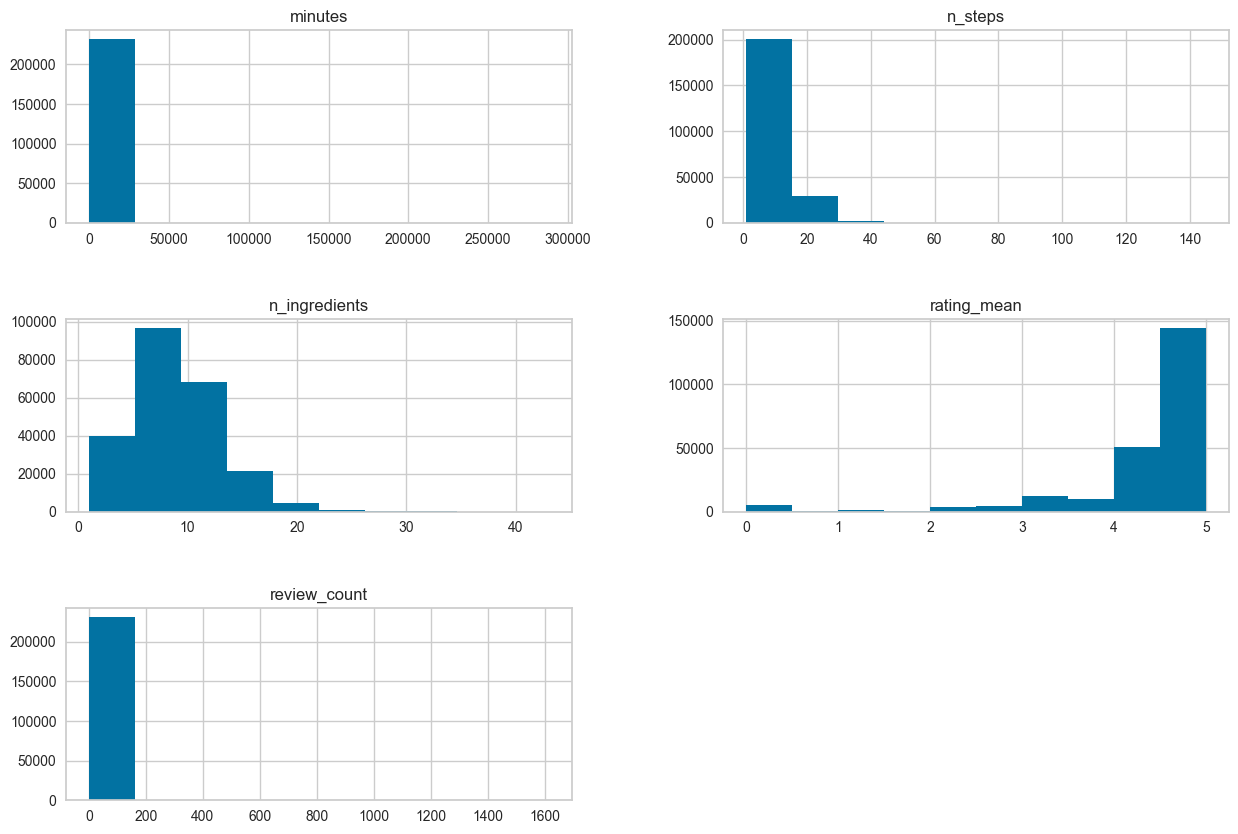

In [31]:
recipe_attributes_sub1.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

From the histograms we can see that most of the features are heavily skewed and have some extreme outliers. The feature closest to having a more normal distribution is the number of ingredients. From this visual I would guess that the descriptive statistics are making the data appear to be more wide spread because of some extreme outliers in the feature data.

I would also like to view some boxplots of the features.

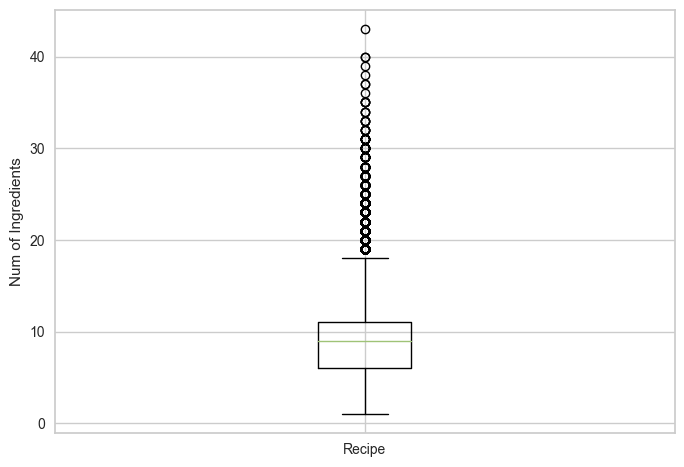

In [32]:
fig, ax= plt.subplots()
ax.boxplot(recipe_attributes_sub1['n_ingredients'])

ax.set_xticklabels(['Recipe'])
ax.set_ylabel('Num of Ingredients')

plt.show()

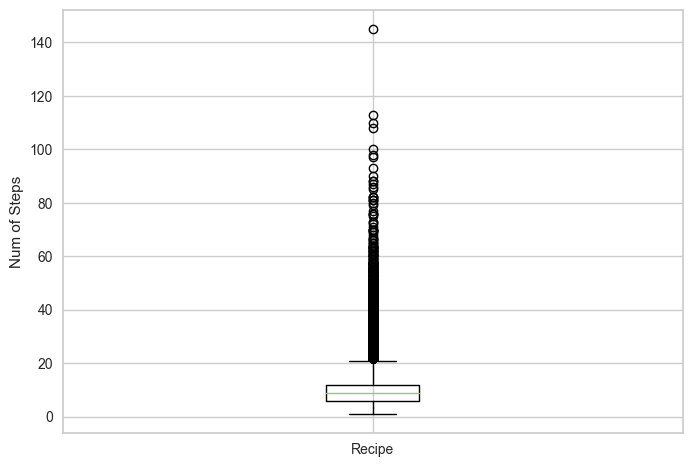

In [33]:
fig, ax= plt.subplots()
ax.boxplot(recipe_attributes_sub1['n_steps'])

ax.set_xticklabels(['Recipe'])
ax.set_ylabel('Num of Steps')

plt.show()

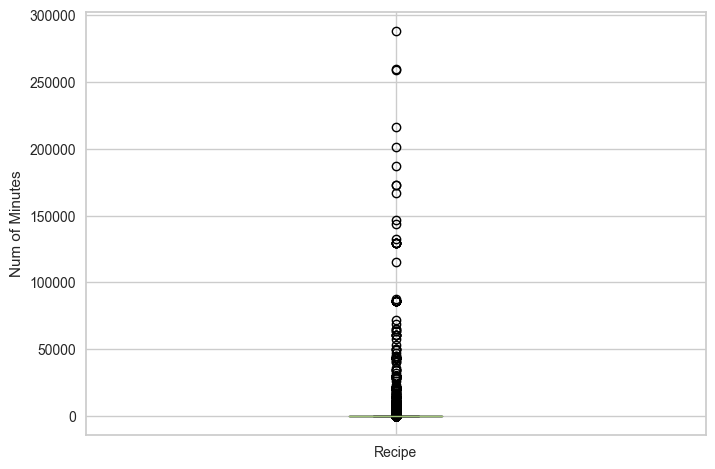

In [34]:
fig, ax= plt.subplots()
ax.boxplot(recipe_attributes_sub1['minutes'])

ax.set_xticklabels(['Recipe'])
ax.set_ylabel('Num of Minutes')

plt.show()

From these we can see that all of the features have very weak measures of central tendency and a lot of outliers.

Let’s take a quick look at the correlation heatmap for this data.

C:\Users\jwatki8\AppData\Local\Temp\ipykernel_3660\3374394056.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = recipe_attributes_sub1.corr()


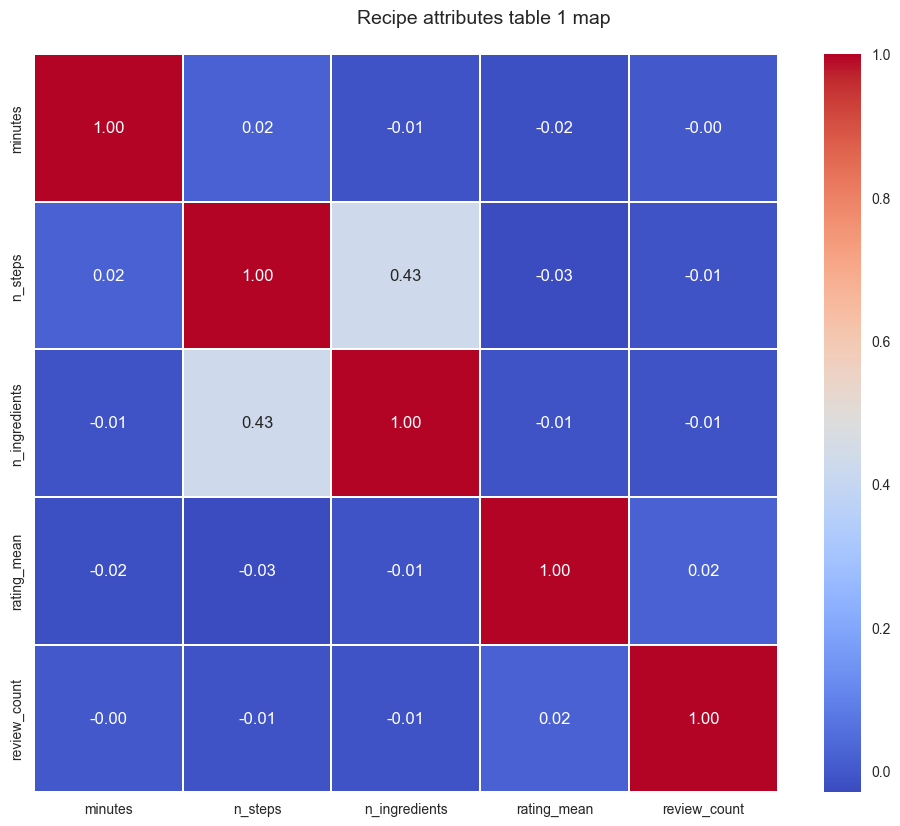

In [35]:
corrmat = recipe_attributes_sub1.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Recipe attributes table 1 map', fontsize=14)

At a glance, there do not appear to be any strong positive or negative correlations among these features. 

Next I want to create some scatter plots of the features in this dataframe vs. the rating mean of the recipes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


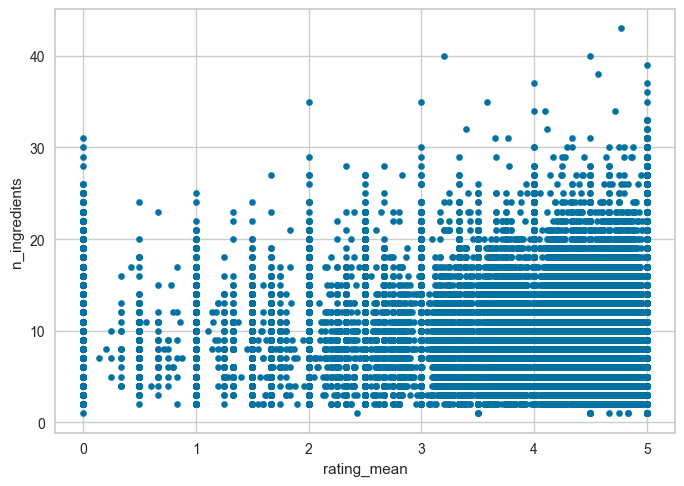

In [36]:
recipe_attributes_sub1.plot(x='rating_mean', y='n_ingredients', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


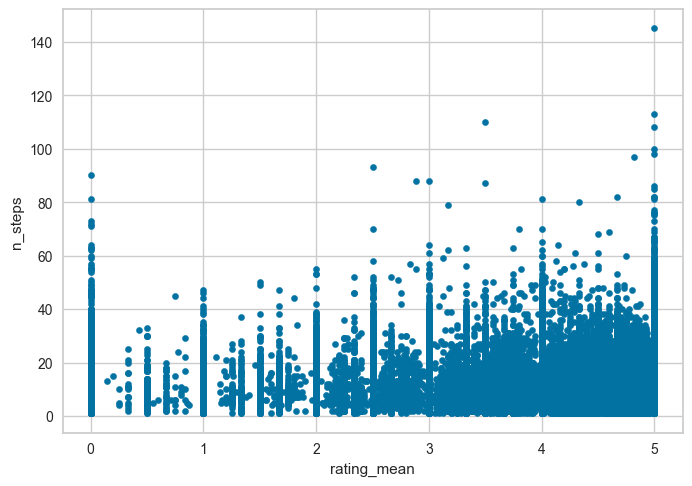

In [37]:
recipe_attributes_sub1.plot(x='rating_mean', y='n_steps', kind='scatter');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


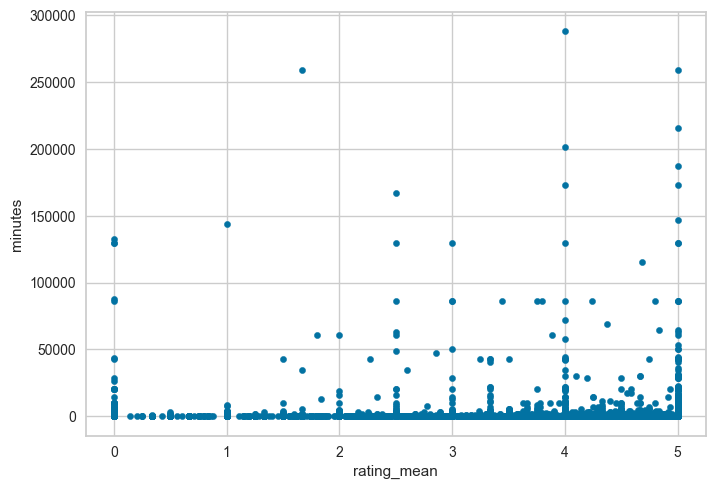

In [38]:
recipe_attributes_sub1.plot(x='rating_mean', y='minutes', kind='scatter');

Looking at the plots for each feature we can see that there seems to be a slight inverse relationship between the rating mean and the both the steps and ingredients features. As far as the minutes feature, it doesn’t seem to have a much of a correlation with the rating mean at all.